In [2]:
import torch

## Notebook objectives
1. Create a train-val-test setup for consistent benchmarking
2. Experiment how weight initialization affects NN performance

# Define a linear regression model

In [ ]:
class LinearRegression(torch.nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LinearRegression, self).__init__()
        self.linear = torch.nn.Linear(input_dim, output_dim)

    def forward(self, x):
        return self.linear(x)

    def backward(self, loss):
        loss.backward()

In [12]:
input_dim = 10
output_dim = 1
n_samples = 25

# Creating a sample train, val and test dataset

In [ ]:
g = torch.Generator().manual_seed(42)

# torch.random.manual_seed(42)

train_X = torch.randn((n_samples, input_dim), generator=g)
train_y = torch.randn((n_samples, output_dim), generator=g)
train_y = torch.where(train_y > 0, 1, 0).squeeze()

val_X = torch.randn((n_samples, input_dim), generator=g)
val_y = torch.randn((n_samples, output_dim), generator=g)
val_y = torch.where(val_y > 0, 1, 0).squeeze()

test_X = torch.randn((n_samples, input_dim), generator=g)
test_y = torch.randn((n_samples, output_dim), generator=g)
test_y = torch.where(test_y > 0, 1, 0).squeeze()

# print(train_X, train_y)


# Run the forward pass

In [ ]:
w_means = []
w_norms = []
g_means = []
g_norms = []
losses  = []

clf = LinearRegression(input_dim, output_dim)

n_epochs = 20
for i in range(n_epochs):
    y_pred = clf(train_X)
    loss = torch.square(torch.abs(y_pred - train_y)).sum()
    print(f" epoch: {i:3d} | loss: {loss: 3f}")

    # backward pass
    clf.backward(loss)

    # update the weights by a small amount
    for param in clf.parameters():
        if param.grad is not None:
            param.data -= 0.00001 * param.grad.data


    all_w_params = torch.cat([p.data.view(-1) for p in clf.parameters()])
    w_means.append(torch.mean(all_w_params).item())
    w_norms.append(torch.norm(all_w_params).item())

    all_grad_params = torch.cat([p.grad.data.view(-1) for p in clf.parameters()])
    g_means.append(torch.mean(all_grad_params).item())
    g_norms.append(torch.norm(all_grad_params).item())

    losses.append(loss.item())

 epoch:   0 | loss:  910.296265
 epoch:   1 | loss:  876.097534
 epoch:   2 | loss:  811.203613
 epoch:   3 | loss:  722.237732
 epoch:   4 | loss:  618.219543
 epoch:   5 | loss:  509.583923
 epoch:   6 | loss:  407.055878
 epoch:   7 | loss:  320.506958
 epoch:   8 | loss:  257.922943
 epoch:   9 | loss:  224.596954
 epoch:  10 | loss:  222.634964
 epoch:  11 | loss:  250.823685
 epoch:  12 | loss:  304.867828
 epoch:  13 | loss:  377.961853
 epoch:  14 | loss:  461.622528
 epoch:  15 | loss:  546.679993
 epoch:  16 | loss:  624.309570
 epoch:  17 | loss:  686.984985
 epoch:  18 | loss:  729.244263
 epoch:  19 | loss:  748.187622


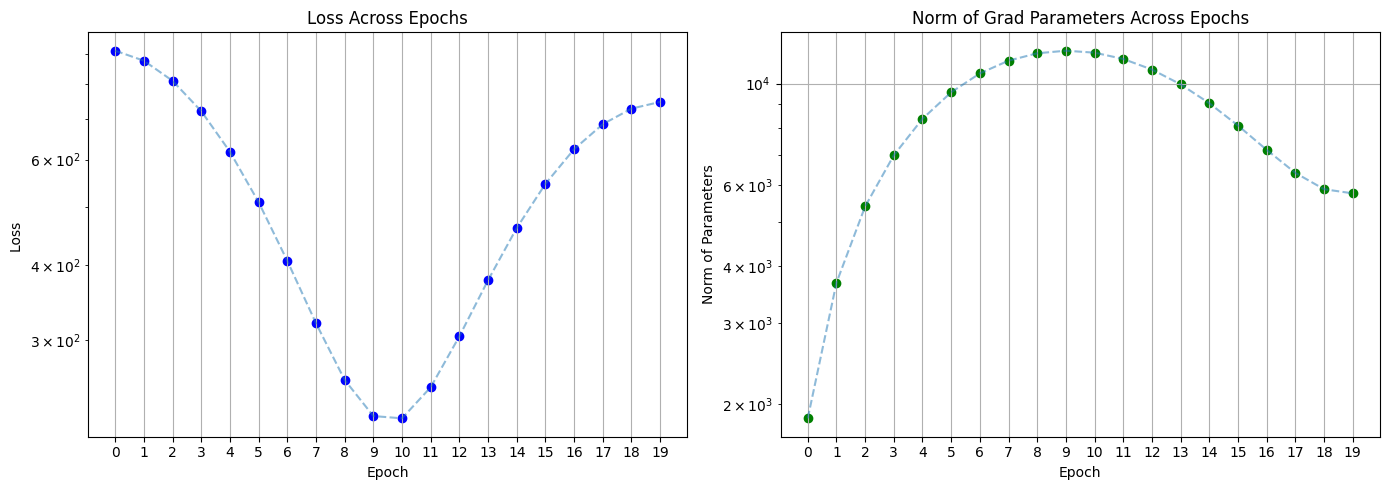

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

epochs = list(range(n_epochs))

# Plot means
axes[0].scatter(epochs, losses, color='blue')
axes[0].plot(epochs, losses, linestyle='dashed', alpha=0.5)
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Loss ')
axes[0].set_title('Loss Across Epochs')
axes[0].set_xticks(epochs)
axes[0].set_yscale('log')  # Set y-axis to log scale
axes[0].grid(True)

# Plot norms
axes[1].scatter(epochs, g_norms, color='green')
axes[1].plot(epochs, g_norms, linestyle='dashed', alpha=0.5)
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Norm of Parameters')
axes[1].set_title('Norm of Grad Parameters Across Epochs')
axes[1].set_xticks(epochs)
axes[1].set_yscale('log')  # Set y-axis to log scale
axes[1].grid(True)

plt.tight_layout()
plt.show()

Let's add an evaluation setup to see performance on a validation set.

In [33]:
w_means = []
w_norms = []
g_means = []
g_norms = []
losses  = []
val_losses = []

clf = LinearRegression(input_dim, output_dim)

n_epochs = 20
for i in range(n_epochs):
    y_pred = clf(train_X)
    loss = torch.square(torch.abs(y_pred - train_y)).sum()

    # backward pass
    clf.backward(loss)

    # update the weights by a small amount
    for param in clf.parameters():
        if param.grad is not None:
            param.data -= 0.00001 * param.grad.data

    # eval
    val_preds = clf(val_X)
    val_loss = torch.square(torch.abs(val_preds - val_y)).sum()

    print(f" epoch: {i:3d} | train_loss: {loss: 3f} | val_loss: {loss: 3f}")

    all_w_params = torch.cat([p.data.view(-1) for p in clf.parameters()])
    w_means.append(torch.mean(all_w_params).item())
    w_norms.append(torch.norm(all_w_params).item())

    all_grad_params = torch.cat([p.grad.data.view(-1) for p in clf.parameters()])
    g_means.append(torch.mean(all_grad_params).item())
    g_norms.append(torch.norm(all_grad_params).item())

    losses.append(loss.item())
    val_losses.append(val_loss.item())

 epoch:   0 | train_loss:  562.834778 | val_loss:  562.834778
 epoch:   1 | train_loss:  547.755615 | val_loss:  547.755615
 epoch:   2 | train_loss:  518.854553 | val_loss:  518.854553
 epoch:   3 | train_loss:  478.532532 | val_loss:  478.532532
 epoch:   4 | train_loss:  430.117004 | val_loss:  430.117004
 epoch:   5 | train_loss:  377.564514 | val_loss:  377.564514
 epoch:   6 | train_loss:  325.109375 | val_loss:  325.109375
 epoch:   7 | train_loss:  276.894562 | val_loss:  276.894562
 epoch:   8 | train_loss:  236.617676 | val_loss:  236.617676
 epoch:   9 | train_loss:  207.226379 | val_loss:  207.226379
 epoch:  10 | train_loss:  190.688934 | val_loss:  190.688934
 epoch:  11 | train_loss:  187.859528 | val_loss:  187.859528
 epoch:  12 | train_loss:  198.447357 | val_loss:  198.447357
 epoch:  13 | train_loss:  221.087769 | val_loss:  221.087769
 epoch:  14 | train_loss:  253.504547 | val_loss:  253.504547
 epoch:  15 | train_loss:  292.743713 | val_loss:  292.743713
 epoch: 

AttributeError: 'numpy.ndarray' object has no attribute 'scatter'

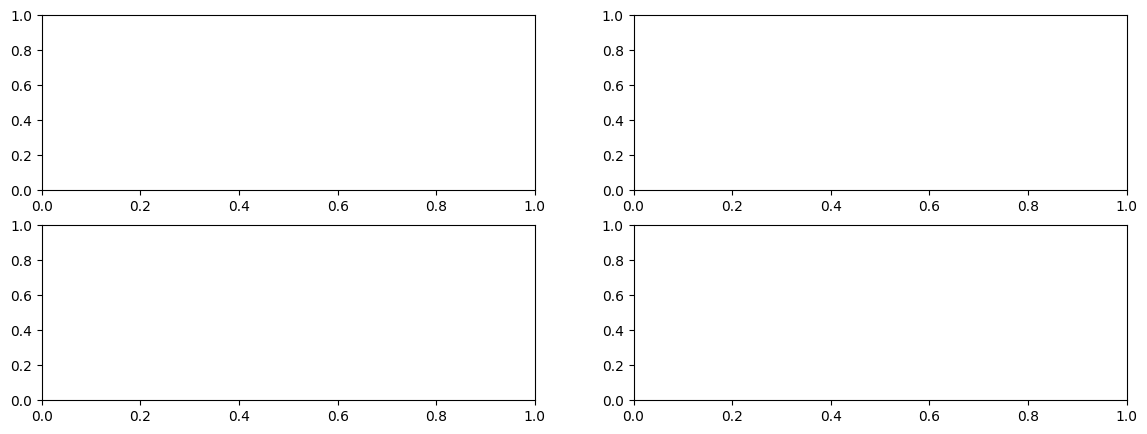

In [34]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, axes = plt.subplots(2, 2, figsize=(14, 5))

epochs = list(range(n_epochs))

# Plot means
axes[0].scatter(epochs, losses, color='blue')
axes[0].plot(epochs, losses, linestyle='dashed', alpha=0.5)
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Loss ')
axes[0].set_title('Loss Across Epochs')
axes[0].set_xticks(epochs)
axes[0].set_yscale('log')  # Set y-axis to log scale
axes[0].grid(True)

# Plot norms
axes[1].scatter(epochs, g_norms, color='green')
axes[1].plot(epochs, g_norms, linestyle='dashed', alpha=0.5)
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Norm of Parameters')
axes[1].set_title('Norm of Grad Parameters Across Epochs')
axes[1].set_xticks(epochs)
axes[1].set_yscale('log')  # Set y-axis to log scale
axes[1].grid(True)

# Plot norms
axes[2].scatter(epochs, val_losses, color='green')
axes[2].plot(epochs, val_losses, linestyle='dashed', alpha=0.5)
axes[2].set_xlabel('Epoch')
axes[2].set_ylabel('Loss')
axes[2].set_title('Val Loss Across Epochs')
axes[2].set_xticks(epochs)
axes[2].set_yscale('log')  # Set y-axis to log scale
axes[2].grid(True)

plt.tight_layout()
plt.show()